# Data Preparation

Import Library

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from mlxtend.plotting import plot_confusion_matrix

Load dataset

In [3]:
data = pd.read_csv('loan_data.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Cek informasi dataset, seperti missing values, tipe data, unique value counts, deskripsi statistik

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [20]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [28]:
attr = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
for attr in attr:
  print(attr,':\n', data[attr].value_counts(dropna=False),'\n')

Gender :
 Male      489
Female    112
NaN        13
Name: Gender, dtype: int64 

Married :
 Yes    398
No     213
NaN      3
Name: Married, dtype: int64 

Dependents :
 0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64 

Education :
 Graduate        480
Not Graduate    134
Name: Education, dtype: int64 

Self_Employed :
 No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64 

Credit_History :
 1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64 

Property_Area :
 Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64 

Loan_Status :
 Y    422
N    192
Name: Loan_Status, dtype: int64 



Copy dataset ke variable baru karena akan dimodifikasi untuk praproses data. Selain itu, drop column ID karena tidak digunakan dalam pemodelan

In [92]:
loan_df = data.copy()

In [93]:
loan_df.drop(columns='Loan_ID', inplace=True)

# Data Preprocessing

## Missing Values

Konfigurasi Missing Values untuk Categorical features meliputi:


*   Gender
*   Married
*   Dependents
*   Self_Employed
*   Credit_History

Pada percobaan ini, dilakukan penggantian missing values tersebut dengan nilai **Modus**

In [94]:
loan_df['Gender'].fillna(loan_df['Gender'].value_counts().idxmax(), inplace=True)
loan_df['Married'].fillna(loan_df['Married'].value_counts().idxmax(), inplace=True)
loan_df['Dependents'].fillna(loan_df['Dependents'].value_counts().idxmax(), inplace=True)
loan_df['Self_Employed'].fillna(loan_df['Self_Employed'].value_counts().idxmax(), inplace=True)
loan_df['Credit_History'].fillna(loan_df['Credit_History'].value_counts().idxmax(), inplace=True)

Konfigurasi Missing Values untuk Numerical/Continuous features meliputi:


*   LoanAmount           
*   Loan_Amount_Term

Pada percobaan ini, dilakukan penggantian missing values tersebut dengan nilai **Median** mengingat **adanya nilai outlier** pada features tersebut

In [41]:
loan_df['LoanAmount'].describe() #cek deskripsi statistik pada LoanAmount untuk mengetahui adanya nilai outlier
# ternyata, terdapat outlier. buktinya, nilai min.= 9 dan nilai max.=700  yang mana angka tersebut jauh dari Kuartil 1 ataupun Kuartil 3

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


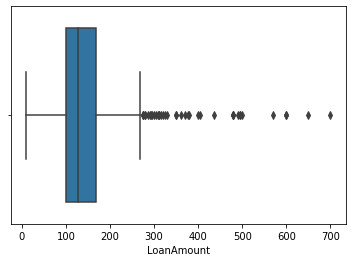

In [35]:
sns.boxplot(loan_df['LoanAmount'])

In [42]:
loan_df['Loan_Amount_Term'].describe() #cek deskripsi statistik pada Loan_Amount_Term untuk mengetahui adanya nilai outlier
# ternyata, terdapat outlier. buktinya, nilai min. adalah sebesar 12 yang mana angka tersebut jauh dari Kuartil 1 atau persentil ke-25

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

In [95]:
# mengganti missing values pada numerical column dengan nilai mediannya
loan_df['LoanAmount'].fillna(loan_df['LoanAmount'].median(), inplace=True)
loan_df['Loan_Amount_Term'].fillna(loan_df['Loan_Amount_Term'].median(), inplace=True)

Cek lagi apakah masih ada data yang null

In [46]:
loan_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Categorical Encoding dan Pengubahan Tipe Data

Mengubah tipe data yang masih String/object menjadi Integer agar lebih mudah untuk Pemodelan (Modelling)

In [97]:
loan_df['Gender'] = loan_df['Gender'].replace({'Male':0,'Female':1})
loan_df['Married'] = loan_df['Married'].replace({'No':0, 'Yes':1})
loan_df['Dependents'] = loan_df['Dependents'].replace({'0':0,'1':1,'2':2,'3+':3})
loan_df['Education'] = loan_df['Education'].replace({'Not Graduate':0, 'Graduate':1})
loan_df['Self_Employed'] = loan_df['Self_Employed'].replace({'No':0, 'Yes':1})
loan_df['Property_Area'] = loan_df['Property_Area'].replace({'Rural':0, 'Semiurban':1, 'Urban':2})
loan_df['Loan_Status'] = loan_df['Loan_Status'].replace({'N':0, 'Y':1})

In [100]:
# cek lagi tipe datanya 
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


In [101]:
loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1


# Pembagian Training dan Test dataset

In [110]:
# memisahkan kolom features & target
X = loan_df.drop(columns = ['Loan_Status'])
y = loan_df['Loan_Status']

In [111]:
# memisahkan training set (80%) dan test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [112]:
# membuat aturan kfold cross-validation untuk membentuk 5 fold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Training Dataset dengan Cross-Validation

In [115]:
rf = RandomForestClassifier()

In [126]:
params = { 'criterion':['gini','entropy'],
          'max_depth':[100,50,None]}

gridsearch_rf = GridSearchCV(rf, params, cv=kfold, scoring="f1")
gridsearch_rf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [100, 50, None]},
             scoring='f1')

In [128]:
gridsearch_rf.best_estimator_ # model terbaik menggunakan ENtropy dg maximum kedalaman tree = 50

RandomForestClassifier(criterion='entropy', max_depth=50)

In [134]:
gridsearch_rf.best_score_ # nilai F1 score terbaik adalah 0.87

0.8689467911297062

In [151]:
res = gridsearch_rf.cv_results_ #menampilkan hasil cross validation
res = pd.DataFrame(res)
res.sort_values('rank_test_score')
# hasilnya fold dengan performa terbaik memiliki :
# mean F1-score sebesar 0.87 
# standar deviasi sebesar 0.03 
# lalu split terbaik adalah split ke-3 dengan F1-score sebesar 0.91

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.324127,0.012862,0.033660,0.009278,entropy,50,"{'criterion': 'entropy', 'max_depth': 50}",0.826667,0.834532,0.872483,0.909091,0.901961,0.868947,0.033722,1
1,0.432134,0.209164,0.043796,0.021213,gini,50,"{'criterion': 'gini', 'max_depth': 50}",0.847682,0.828571,0.872483,0.887417,0.907895,0.868810,0.028117,2
3,0.344088,0.019862,0.030486,0.002223,entropy,100,"{'criterion': 'entropy', 'max_depth': 100}",0.834437,0.834532,0.864865,0.881579,0.915033,0.866089,0.030445,3
2,0.420247,0.206911,0.036238,0.006411,gini,None,"{'criterion': 'gini', 'max_depth': None}",0.832215,0.840580,0.864865,0.888889,0.901961,0.865702,0.026854,4
5,0.320286,0.010271,0.029833,0.003187,entropy,None,"{'criterion': 'entropy', 'max_depth': None}",0.832215,0.834532,0.864865,0.881579,0.915033,0.865645,0.030917,5
0,0.333323,0.031788,0.028457,0.001555,gini,100,"{'criterion': 'gini', 'max_depth': 100}",0.818792,0.834532,0.864865,0.896104,0.900662,0.862991,0.032504,6


In [152]:
# Hasil prediksi dengan model terbaik yg dihasilkan dari GridsearchCV sebelumnya adlaah sbg berikut
y_pred = gridsearch_rf.predict(X_test)
print("Accuracy score of prediction:", accuracy_score(y_test, y_pred))
print("F1 score of prediction:", f1_score(y_test,y_pred))

Accuracy score of prediction: 0.7723577235772358
F1 score of prediction: 0.8461538461538461


(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0d0b646390>)

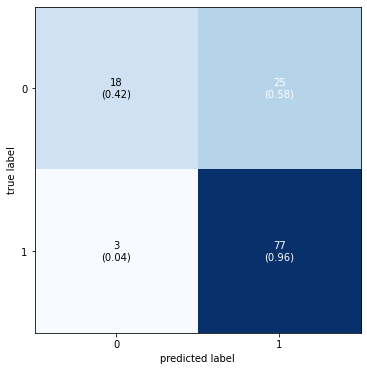

In [138]:
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat = cm,figsize=(8,6),show_normed=True)
# hasil dari confusion matrix menunjukkan bahwa model cenderung lebih banyak memprediksi pinjaman yang disetujui secara benar, daripada memprediksi yang tidak disetujui